In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Data generation**

In [ ]:
# Normal ANN or Deep ANN? Which one is better? Let's find out | شبکه عصبی مصنوعی ساده یا عمیق؟

x = np.arange(-80, 81, 0.5)
y = x ** 2 + 5 * x + 3

y.shape

(322,)

In [ ]:
# Split train and test data | جدا کردن مقادیر ترین و تست

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape

((257,), (65,))

**Model definition**

In [ ]:
# First model (normal ANN) | ساخت مدل اول

model_1 = keras.Sequential()

model_1.add(keras.layers.Dense(units=1024, activation='relu', input_shape=[1])) # Hidden layer | لایه پنهان 
# Output layer | لایه خروجی
model_1.add(keras.layers.Dense(units=1)) # اینجا از اکتیویشن فانکشن استفاده نمیکنیم تا رابطه مون خطی باشه

c:\Users\Abolfazl\Desktop\Cumputer\programing\machine_learning\AI-Learning-Journey\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the first model | کامپایل کردن
model_1.compile(optimizer='adam', loss="mean_squared_error")

# Display the model architecture and parameters | دیدن اطلاعات شبکه
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the first model | فیت کردن مدل
# مدل ساده

# اطلاعات هر ایپاک رو توی متغیر نگه میدارم تا بعدا عملکرد مدل رو بررسی کنیم

# validation_data -> داده‌های تست رو به مدل می‌دیم تا بعد از هر ایپاک عملکرد مدل رو روی داده‌های تست بررسی کنه
# این کمک میکنه که ببینیم مدل روی داده‌های جدید و دیده‌ نشده چقدر خوب عمل می‌ کنه
hist_1 = model_1.fit(x_train, y_train, batch_size=64, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 8901247.0000 - val_loss: 8261687.0000
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 8796816.0000 - val_loss: 8217831.0000
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 8967574.0000 - val_loss: 8174607.0000
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8093228.0000 - val_loss: 8130255.0000
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8061774.5000 - val_loss: 8084271.0000
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7490383.0000 - val_loss: 8035564.5000
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8157572.0000 - val_loss: 7982538.0000
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8212887.5000 - val_loss: 7928144.0000
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8404663.0000 - val_loss: 7870489.5000
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7886207.0000 - val_loss: 7810213.5000
Epoch 11/1000
5/5 ━━━━━━━━━━

In [ ]:
# Second model (deep ANN) | ساخت مدل دوم
# اینبار مدلمون رو عمیق تر میکنیم

model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(units=256, activation='relu', input_shape=[1]))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=1))

In [ ]:
# Compile the first model | کامپایل کردن

model_2.compile(optimizer='adam', loss='mean_squared_error')
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,145 (774.00 KB)

 Trainable params: 198,145 (774.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model | فیت کردن

hist_2 = model_2.fit(x_train, y_train, batch_size=64, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 8253443.0000 - val_loss: 8141039.5000
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8306093.5000 - val_loss: 7759415.5000
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8060813.0000 - val_loss: 6842076.0000
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7311001.0000 - val_loss: 5002268.5000
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4435590.0000 - val_loss: 2254722.0000
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1648724.6250 - val_loss: 513565.1562
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 669226.7500 - val_loss: 1136040.1250
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1063739.5000 - val_loss: 586853.3125
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 598011.6250 - val_loss: 558730.3750
Epoch 10/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 617597.4375 - val_loss: 654022.7500
Epoch 11/1000
5/5 ━━━━━━━━━━━━━━━━━━

**Comparison**

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


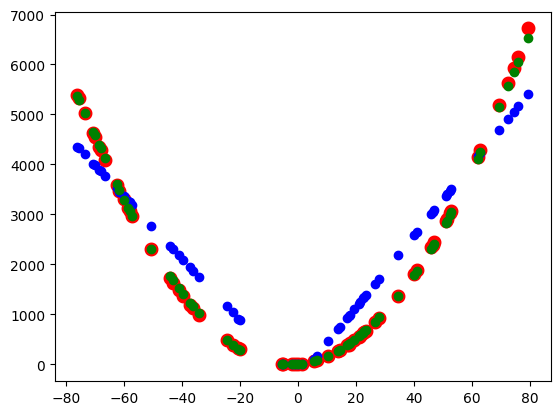

In [ ]:
# مقایسه مدل ها

y_pred_1 = model_1.predict(x_test)
y_pred_2 = model_2.predict(x_test)

plt.scatter(x_test, y_test, color='red', linewidths=4)
plt.scatter(x_test, y_pred_1, color='blue')
plt.scatter(x_test, y_pred_2, color='green')
plt.show()

# Deep ANN is better | میبینیم که مدل دوم که عمیق تر بود بهتر عمل کرده

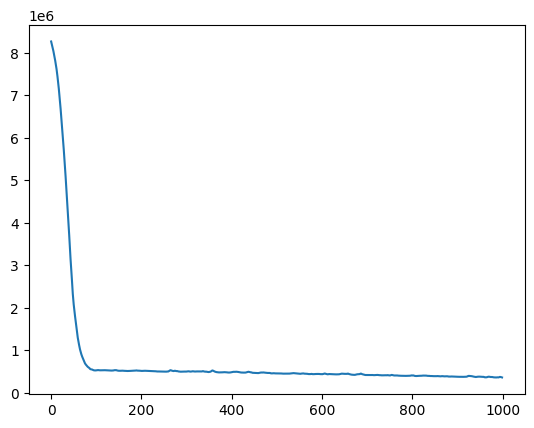

In [12]:
# تاریخچه مدل ها بر اساس تابع هزینه

plt.plot(hist_1.history['val_loss'])
plt.show()

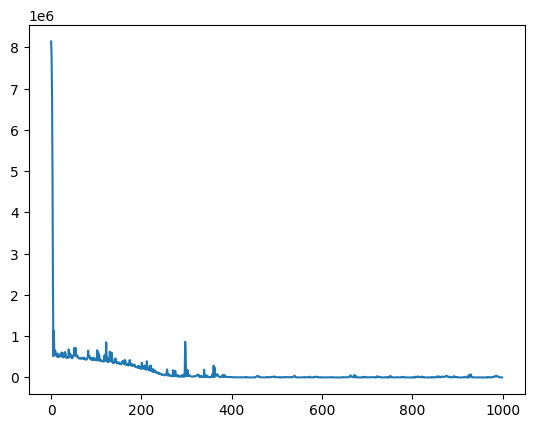

In [ ]:
plt.plot(hist_2.history['val_loss'])
plt.show()